# Этап 1. Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
#from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# Этап 2. Загрузка датасета

В данном случае используется датасет UNSW_NB15

https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15

In [2]:
df_train = pd.read_csv("./UNSW_NB15_training-set.csv")
df_test = pd.read_csv("./UNSW_NB15_testing-set.csv")
print("Length of training set: ", len(df_train))
print("Length of testing set: ", len(df_test))

Length of training set:  82332
Length of testing set:  175341


Объединим две части для предобработки

In [34]:
df = pd.concat([df_train, df_test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt 

In [4]:
df.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


In [5]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


## Проверка на дублирующиеся записи

In [6]:
print(df.duplicated().sum())

0


## Проверка на наличие пустых значений

In [7]:
print(df.isna().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

There is no missing value.

## Проверка баланса между нормальным и опасным трафиком

<Axes: xlabel='label'>

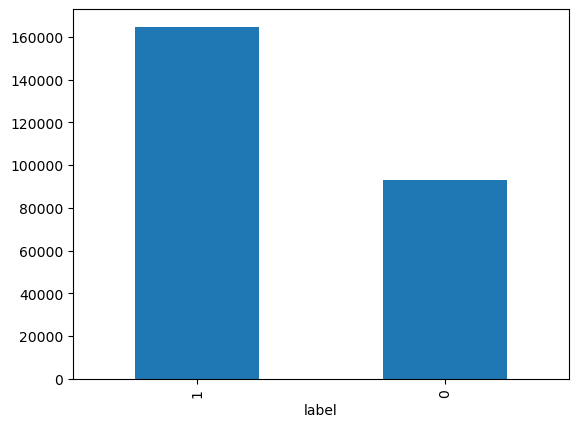

In [8]:
df['label'].value_counts().plot.bar()

In [9]:
df['label'].value_counts(normalize=True)

label
1    0.639077
0    0.360923
Name: proportion, dtype: float64

Как можно заметить, в данном датасете присутствует небольшая несбалансированность 

# Этап 3. Предобработка данных

## Удаление лишних стобцов

In [10]:
df = df.drop(columns=['id', 'label'])

## Кодирование категориальных признаков

In [11]:
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


In [12]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,6
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,6
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,6
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,6
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,6


## Корреляция данных
Проведем удаление сильно коррелирующих признаков

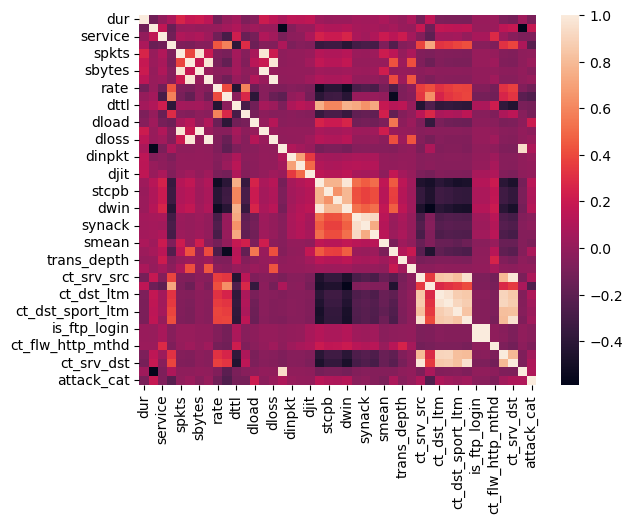

In [13]:
sns.heatmap(df.corr())
plt.show()

In [14]:
cor_feats = df[['spkts','sbytes','sloss','dpkts','dbytes','dloss','sinpkt','is_sm_ips_ports','swin',
'dwin','tcprtt','tcprtt','synack','ct_srv_src','ct_srv_src','ct_srv_dst','ct_dst_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','is_ftp_login',
'ct_ftp_cmd']]

In [15]:
from scipy.stats import variation

In [16]:
variation(cor_feats, ddof=1)

array([ 6.87395273, 20.27001721, 13.41188397,  6.04848842, 10.16169876,
        7.96332821,  7.58757745,  8.31012514,  1.04610771,  1.06688083,
        2.01807512,  2.01807512,  2.27704566,  1.15416212,  1.15416212,
        1.19226989,  1.3361532 ,  1.55792282,  1.44606551,  9.05644751,
        9.06027798])

In [17]:
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.75:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

spkts sbytes 0.9643932171558754
spkts sloss 0.9718594116511157
dpkts dbytes 0.9734453279792993
dpkts dloss 0.9796120849360007
sbytes sloss 0.995771577240686
dbytes dloss 0.9967111338314709
dttl dwin 0.7637549036274037
sinpkt is_sm_ips_ports 0.9421206232319632
swin stcpb 0.7694339964298297
swin dtcpb 0.7687067526530598
swin dwin 0.9804584289136614
stcpb dwin 0.7842487673985195
dtcpb dwin 0.7837880908218406
tcprtt synack 0.9430527539835085
tcprtt ackdat 0.9202175911910093
ct_srv_src ct_dst_ltm 0.8409951124111219
ct_srv_src ct_src_dport_ltm 0.8618545947586924
ct_srv_src ct_dst_sport_ltm 0.8148560554331603
ct_srv_src ct_dst_src_ltm 0.9539519771685916
ct_srv_src ct_src_ltm 0.7942324238395261
ct_srv_src ct_srv_dst 0.9794668130725328
ct_dst_ltm ct_src_dport_ltm 0.9615176986568873
ct_dst_ltm ct_dst_sport_ltm 0.8711178093975873
ct_dst_ltm ct_dst_src_ltm 0.857494026584352
ct_dst_ltm ct_src_ltm 0.9015817705704524
ct_dst_ltm ct_srv_dst 0.8530854336257346
ct_src_dport_ltm ct_dst_sport_ltm 0.9083371

In [18]:
df = df.drop(columns=correlated_vars)

## Разбиение на обучающую и тестовую выборку

In [19]:
X = df.drop(columns=['attack_cat'])
feature_list = list(X.columns)
X = np.array(X)
y = df['attack_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True)

In [20]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302


## Нормирование

In [21]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[-0.20849004, -4.87845716, -0.69441692, ...,  0.6791945 ,
        -0.11240224, -0.19241864],
       [-0.1102245 ,  0.13439245,  1.54013112, ..., -0.32920969,
        -0.11240224,  5.51804037],
       [-0.208321  ,  0.41548682,  0.1994023 , ..., -1.33761388,
        -0.11240224, -0.19241864],
       ...,
       [-0.03369283,  0.13439245, -0.69441692, ..., -0.32920969,
        -0.11240224, -0.19241864],
       [-0.20848953,  0.46233589, -0.69441692, ...,  0.6791945 ,
        -0.11240224, -0.19241864],
       [-0.20831848,  0.41548682,  0.1994023 , ..., -1.33761388,
        -0.11240224, -0.19241864]])

In [23]:
from keras.utils import to_categorical
num_classes = len(np.unique(y_train.values))
train_labels = to_categorical(y_train, num_classes)
test_labels = to_categorical(y_test, num_classes)

# Этап 4. Сравнительный анализ моделей

In [25]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
models = {}
models['Random Forest Classifier'] = RandomForestClassifier(random_state=42)
models['AdaBoostClassifier'] = AdaBoostClassifier(random_state=42)
models['XGBoostClassifier'] = XGBClassifier()
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('xgb', XGBClassifier(XGBClassifier(random_state=42, verbosity=0, use_label_encoder=False)))
    ]
models['StackingClassifier'] = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=10)

c:\Users\SVS1984\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


In [26]:
train_score, accuracy, precision, recall, training_time, y_pred = {}, {}, {}, {}, {}, {}
start_time = time.time()
models['Random Forest Classifier'].fit(X_train, y_train)
training_time['Random Forest Classifier'] = time.time() - start_time
    
y_pred['Random Forest Classifier'] = models['Random Forest Classifier'].predict(X_test)
    
train_score['Random Forest Classifier'] = models['Random Forest Classifier'].score(X_train, y_train)
accuracy['Random Forest Classifier'] = models['Random Forest Classifier'].score(X_test, y_test)
precision['Random Forest Classifier'] = precision_score(y_test, y_pred['Random Forest Classifier'], average='micro')
recall['Random Forest Classifier'] = recall_score(y_test, y_pred['Random Forest Classifier'], average='micro')

In [27]:
start_time = time.time()
models['AdaBoostClassifier'].fit(X_train, y_train)
training_time['AdaBoostClassifier'] = time.time() - start_time
    
y_pred['AdaBoostClassifier'] = models['AdaBoostClassifier'].predict(X_test)
    
train_score['AdaBoostClassifier'] = models['AdaBoostClassifier'].score(X_train, y_train)
accuracy['AdaBoostClassifier'] = models['AdaBoostClassifier'].score(X_test, y_test)
precision['AdaBoostClassifier'] = precision_score(y_test, y_pred['AdaBoostClassifier'], average='micro')
recall['AdaBoostClassifier'] = recall_score(y_test, y_pred['AdaBoostClassifier'], average='micro')

In [28]:
start_time = time.time()
models['XGBoostClassifier'].fit(X_train, y_train)
training_time['XGBoostClassifier'] = time.time() - start_time
    
y_pred['XGBoostClassifier'] = models['XGBoostClassifier'].predict(X_test)
    
train_score['XGBoostClassifier'] = models['XGBoostClassifier'].score(X_train, y_train)
accuracy['XGBoostClassifier'] = models['XGBoostClassifier'].score(X_test, y_test)
precision['XGBoostClassifier'] = precision_score(y_test, y_pred['XGBoostClassifier'], average='micro')
recall['XGBoostClassifier'] = recall_score(y_test, y_pred['XGBoostClassifier'], average='micro')

In [29]:
start_time = time.time()
models['StackingClassifier'].fit(X_train, y_train)
training_time['StackingClassifier'] = time.time() - start_time
    
y_pred['StackingClassifier'] = models['StackingClassifier'].predict(X_test)
    
train_score['StackingClassifier'] = models['StackingClassifier'].score(X_train, y_train)
accuracy['StackingClassifier'] = models['StackingClassifier'].score(X_test, y_test)
precision['StackingClassifier'] = precision_score(y_test, y_pred['StackingClassifier'], average='micro')
recall['StackingClassifier'] = recall_score(y_test, y_pred['StackingClassifier'], average='micro')

c:\Users\SVS1984\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:160: UserWarning: [12:30:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "objective__enable_categorical", "objective__missing", "objective__objective", "objective__random_state", "objective__use_label_encoder", "objective__verbosity" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\SVS1984\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:160: UserWarning: [12:31:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "objective__enable_categorical", "objective__missing", "objective__objective", "objective__random_state", "objective__use_label_encoder", "objective__verbosity" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\SVS1984\anaconda3\envs\tf\lib\site-packages\xgboost

Try Feature selection using Recursive Feature Elimination.

In [31]:
train_score, accuracy, precision, recall, training_time, y_pred = {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(X_train, y_train)
    training_time[key] = time.time() - start_time
    
    y_pred[key] = models[key].predict(X_test)
    
    train_score[key] = models[key].score(X_train, y_train)
    accuracy[key] = models[key].score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key], average='weighted')
    recall[key] = recall_score(y_test, y_pred[key], average='weighted')

c:\Users\SVS1984\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SVS1984\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:160: UserWarning: [12:41:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "objective__enable_categorical", "objective__missing", "objective__objective", "objective__random_state", "objective__use_label_encoder", "objective__verbosity" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\SVS1984\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:160: UserWarning: [12:42:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-wind

In [32]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()

In [33]:
df_models

,Training score,Accuracy,Precision,Recall,Training time
Random Forest Classifier,0.909148,0.819228,0.815545,0.819228,52.907406
AdaBoostClassifier,0.577282,0.578911,0.680889,0.578911,19.168700
XGBoostClassifier,0.841937,0.824390,0.822494,0.824390,7.426022
StackingClassifier,0.861247,0.825412,0.820760,0.825412,148.759871


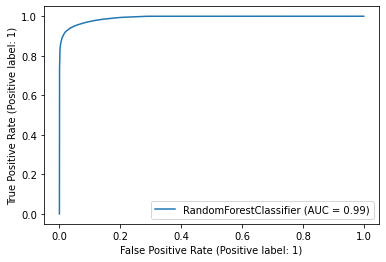

In [ ]:
display = RocCurveDisplay.from_estimator(models['Random Forest Classifier'], X_test, y_test)
plt.show()

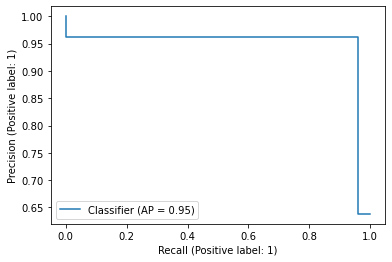

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred['Random Forest Classifier'])

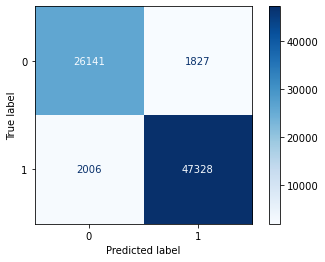

In [ ]:
cm = confusion_matrix(y_test, y_pred['Random Forest Classifier'], labels=models['Random Forest Classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models['Random Forest Classifier'].classes_)
disp.plot(cmap='Blues')
plt.show()